In [1]:
from collections import defaultdict, OrderedDict
import math
import json

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import sim_lib.util as util
import sim_lib.attr_lib.util as alu
from sim_lib.attr_lib.formation import *
import sim_lib.attr_lib.vis as vis

In [2]:
# Setup
filepath = 'data/comp_comparisons.json'

component_data = None
with open(filepath, 'r') as cdf:
    component_data = json.loads(cdf.read())
    
max_bucket = 5
buckets = [ str(b) for b in list(range(1, max_bucket + 1)) ]
buckets.append(f'{max_bucket}+')

In [3]:
def plot_grid_values(comp_dict):
    theta_values = sorted(list(comp_dict.keys()))
    attr_strats = sorted(list(comp_dict[theta_values[0]].keys()))
    struct_strats = sorted(list(comp_dict[theta_values[0]][attr_strats[0]].keys()))
    seed_types = sorted(list(comp_dict[theta_values[0]][attr_strats[0]][struct_strats[0]].keys()))
    count_types = sorted(list(comp_dict[theta_values[0]][attr_strats[0]][struct_strats[0]][seed_types[0]].keys()))
    
    bucket_cnt = len(buckets) + 1
    setup_cnt = len(attr_strats) * len(seed_types) * len(struct_strats)
    
    alpha_values = np.linspace(0, 1, len(theta_values) + 1)[1:]
    
    # Split into different grids
    comp_fig = plt.figure(figsize=(20, 20))
    plt_idx = 1
    for ctype in count_types:
        for sidx, size in enumerate(buckets):
            size_subplots = []
            max_yval = -1
            min_yval = np.infty
            for ast in attr_strats:
                for seed in seed_types:
                    for sst in struct_strats:
                        comp_ax = comp_fig.add_subplot(bucket_cnt * len(count_types), setup_cnt, plt_idx)
                        plt_idx += 1
                        comp_ax.set_title(f'{ast} {sst}; {ctype} size {size}')

                        for tidx, theta in enumerate(theta_values):
                            setup_data = comp_dict[theta][ast][sst][seed][ctype]
                            it_data = []
                            for counts_dict in setup_data:
                                if sidx == len(buckets) - 1:
                                    greater_counts = [ count for size, count in counts_dict.items() \
                                                      if int(size) > max_bucket ]
                                    if len(greater_counts) == 0:
                                        it_data.append(0)
                                    else:
                                        it_data.append(sum(greater_counts))
                                else:
                                    if size in counts_dict:
                                        it_data.append(int(counts_dict[size]))
                                    else:
                                        it_data.append(0)
                            x_vals = list(range(1, len(it_data) + 1))
                            comp_ax.plot(x_vals, it_data,
                                         color='orange',
                                         alpha=alpha_values[tidx],
                                         label=f'theta {theta}')

                            max_yval = max(it_data) if max(it_data) > max_yval else max_yval
                            min_yval = min(it_data) if min(it_data) < min_yval else min_yval
                            size_subplots.append(comp_ax)
                for sz in size_subplots:
                    sz.set_ylim([min_yval - 0.5, max_yval + 0.5])      

    comp_fig.tight_layout()
    plt.xlabel('Iteration')
    plt.legend(loc='upper right')
    plt.show()

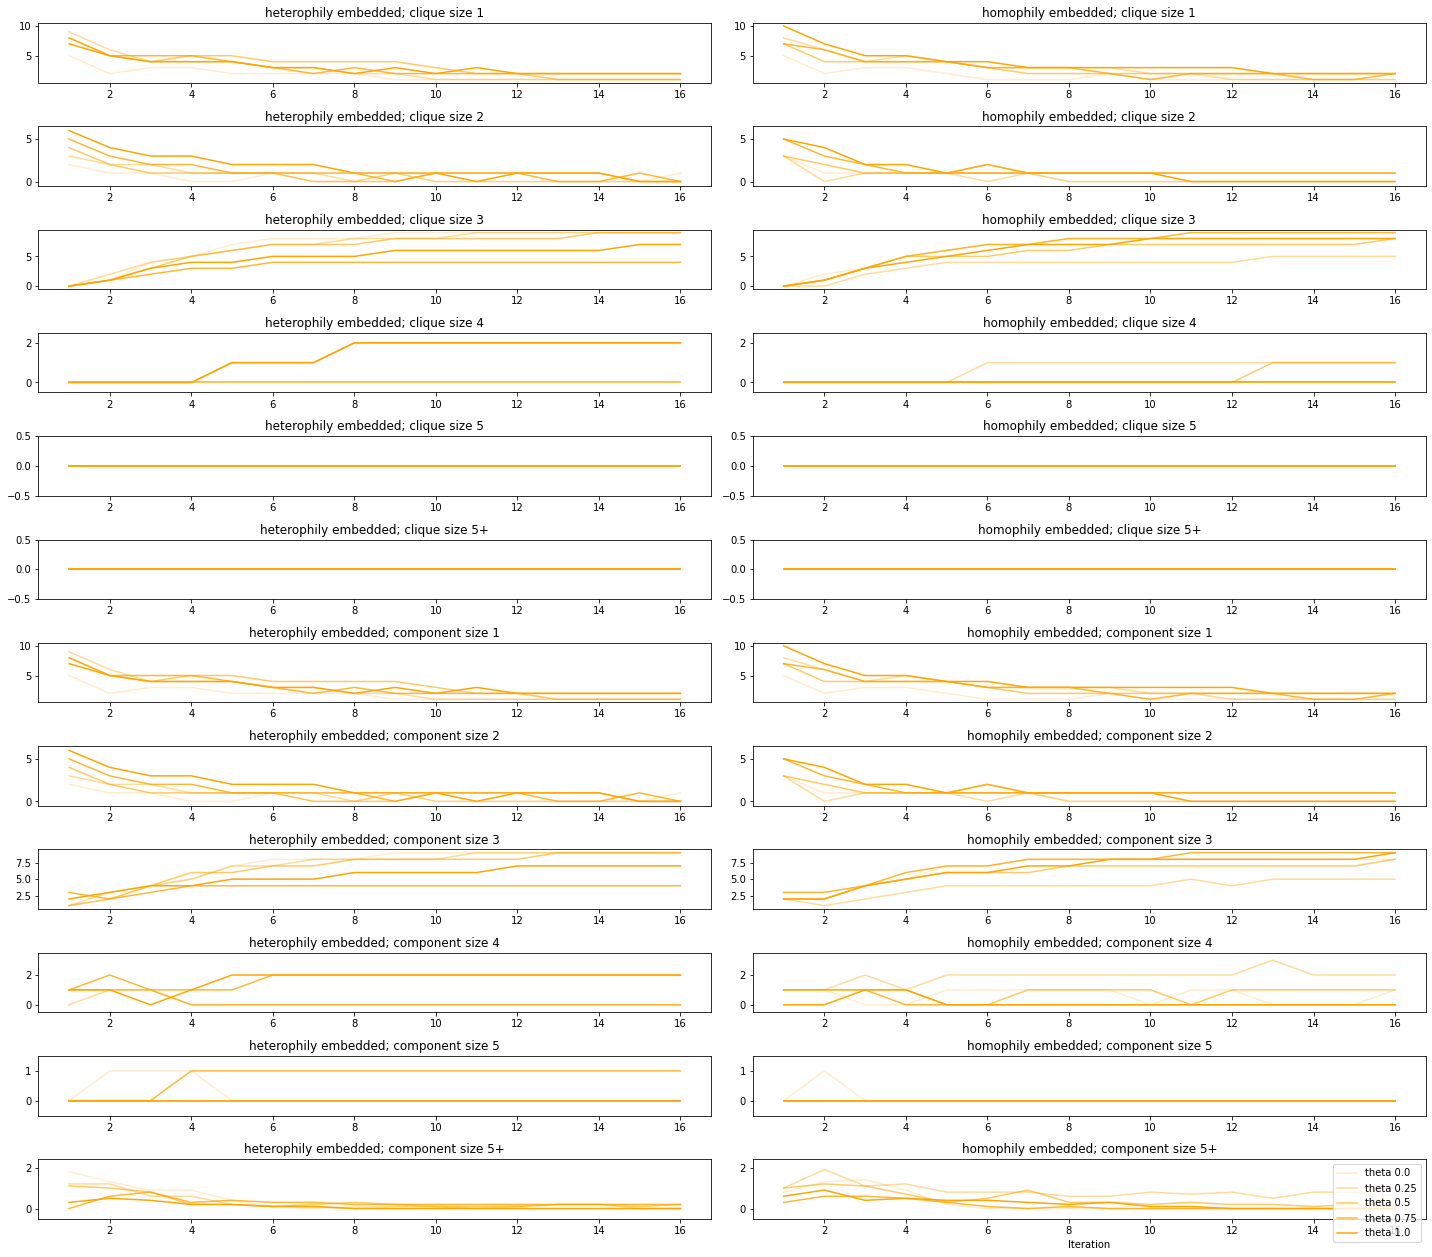

In [4]:
plot_grid_values(component_data)

In [5]:
def plot_component_hists(comp_dict):
    theta_values = sorted(list(comp_dict.keys()))
    attr_strats = sorted(list(comp_dict[theta_values[0]].keys()))
    struct_strats = sorted(list(comp_dict[theta_values[0]][attr_strats[0]].keys()))
    seed_types = sorted(list(comp_dict[theta_values[0]][attr_strats[0]][struct_strats[0]].keys()))
    count_types = sorted(list(comp_dict[theta_values[0]][attr_strats[0]][struct_strats[0]][seed_types[0]].keys()))
    
    setup_cnt = len(attr_strats) * len(seed_types) * len(struct_strats)
    
    alpha_values = np.linspace(0, 1, len(theta_values) + 1)[1:]
    
    # Split into different grids
    comp_fig = plt.figure(figsize=(20, 20))
    plt_idx = 1
    for ctype in count_types:
        size_subplots = []
        max_yval = -1
        for ast in attr_strats:
            for seed in seed_types:
                for sst in struct_strats:
                    comp_ax = comp_fig.add_subplot(len(count_types), setup_cnt, plt_idx)
                    plt_idx += 1
                    comp_ax.set_title(f'{ast} {sst}; {ctype} distributions')

                    dist_sizes = []
                    dist_weights = []
                    for tidx, theta in enumerate(theta_values):
                        setup_data = comp_dict[theta][ast][sst][seed][ctype]
                        final_dist = setup_data[-1]
                        sizes, cnt_weights = zip(*[(k, final_dist[k])
                                                   for k in sorted(final_dist.keys())])
                        dist_sizes.append(sizes)
                        dist_weights.append(cnt_weights)

                        max_count = max(final_dist.values())
                        max_yval = max_count if max_count > max_yval else max_yval
                        size_subplots.append(comp_ax)
                        
                    comp_ax.hist(dist_sizes, weights=dist_weights,
                        histtype='bar',
                        color=[(0.1, 0.2, 0.5, alp) for alp in alpha_values],
                        label=theta_values)
            for sz in size_subplots:
                sz.set_ylim([0, max_yval + 1])

    comp_fig.tight_layout()
    plt.xlabel('Size')
    plt.legend(loc='upper right')
    plt.show()

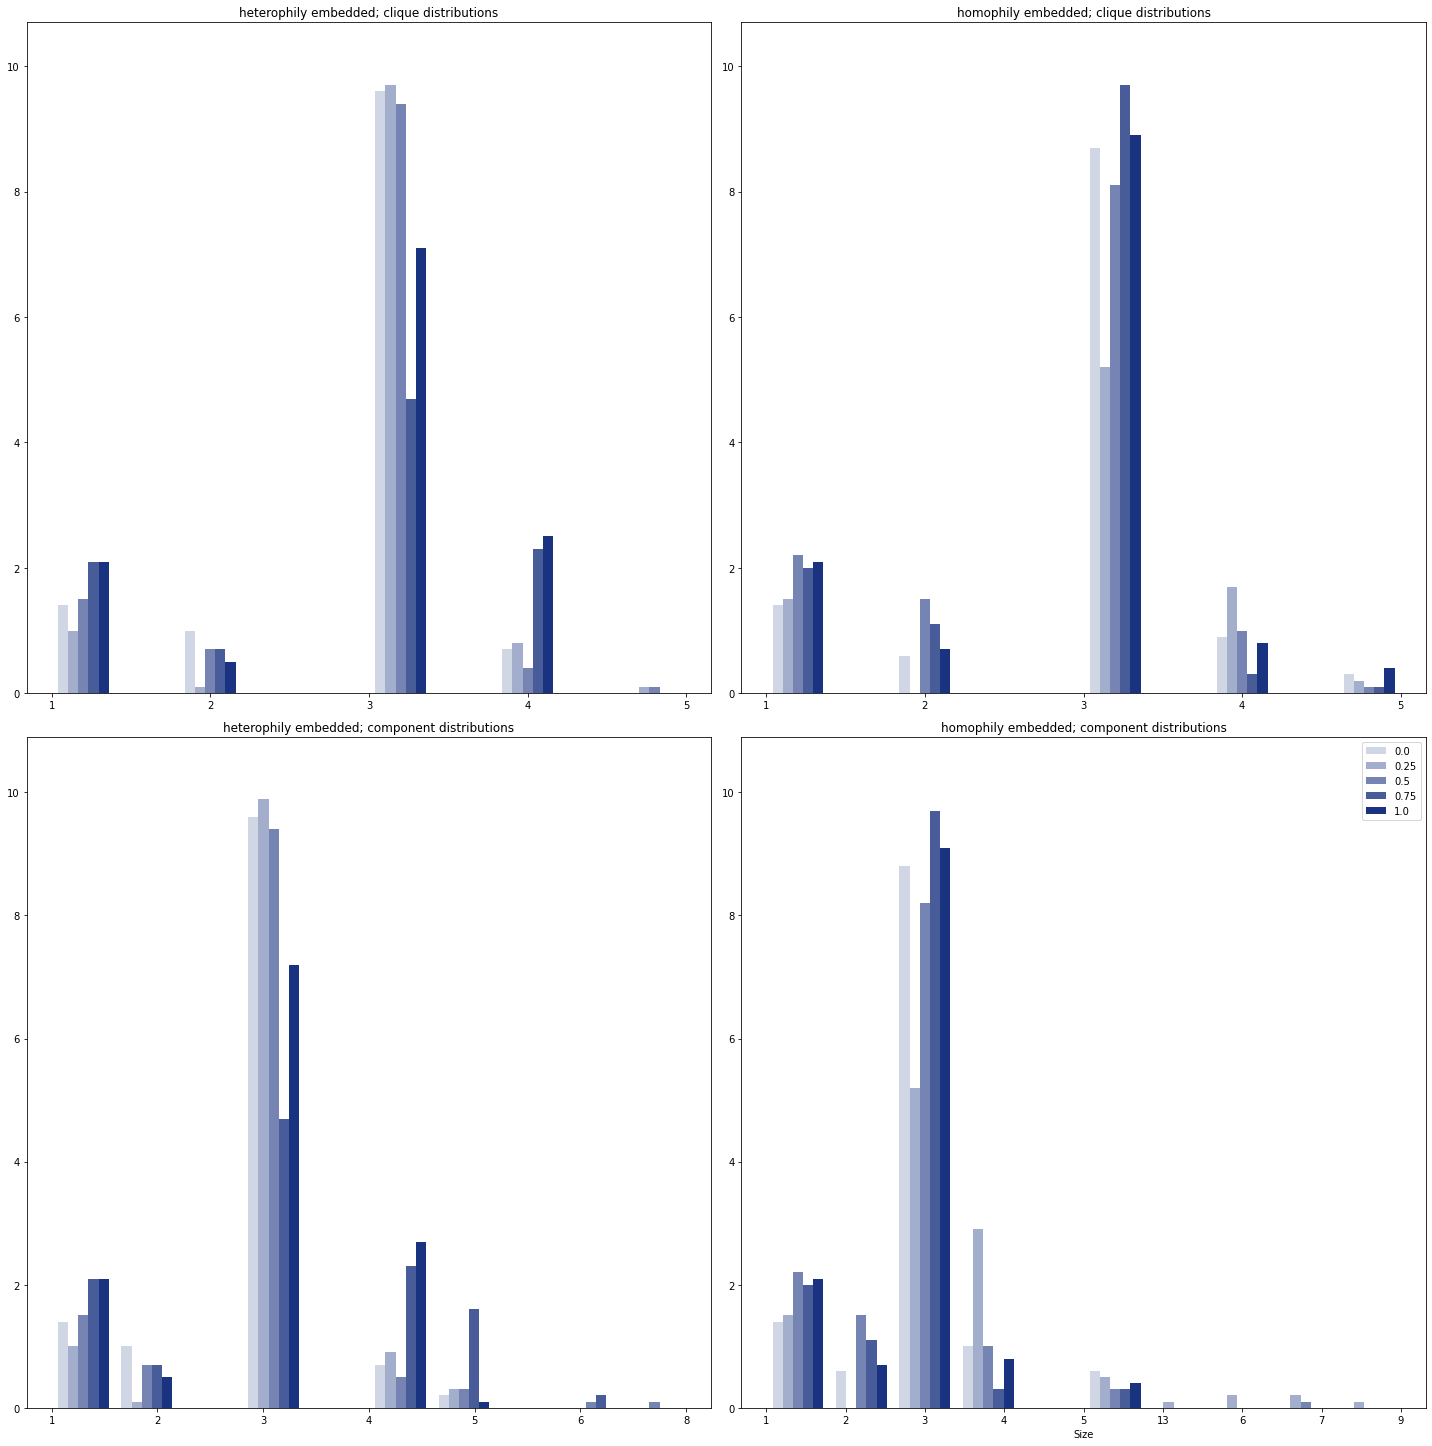

In [6]:
plot_component_hists(component_data)